## 9.5 Bayesian inference on proportions

Consider a new drug being developed for the relief of chronic pain. To find out about its efficacy, we propose to run a single-arm early-phase clinical trial in which we give this drug to a number $n$ of randomly selected patients. Because patients are independent of each other, so it seems reasonable to model the data using the Binomial distribution, $Y\sim Bin(n,\theta).$ We have that $\theta\in [0,1]$ is the probability of pain relief (success) in each patient, and this is unknown. We then make the observation that there are $y$ successes out of $n$ independent trials. As a reminder, the probability distribution function of the Binomial distribution is:  

$$
p \left(y \mid \theta \right) = {n \choose y} \theta^y (1-\theta)^{n-y}.
$$

To proceed, we need to have a prior distribution for $\theta$. Let us consider three possible prior distributions: 

1. An uninformative prior, where all values of $\theta$ are equally probable.   
   You essentially have no prior information about the effectiveness of the drug.   
2. A symmetrical, concave prior that is centered at 0.5.   
   You think that the drug is likely to be effective for patients around half of the time.      
3. An asymmetrical prior with a spike at 0.1.     
   You think that the drug is generally ineffective, and feel quite strongly about it.   

Now, the Beta distribution is a flexible distribution that can represent each of these prior beliefs by appropriate choice of its parameters. It is also convenient because it has a similar form to the Binomial distribution. 


### 9.5.1 The Beta prior 

The Beta distribution is a flexible two parameter distribution that is restricted to the interval between 0 and 1, and so it is a reasonable form for a probability distribution for a proportion. The two parameters, $a$ and $b$, are often called  "shape" parameters. Given $\theta \sim \hbox{Beta}(a,b)$, the probability density function, expectation and variance of the distribution are as follows: 

$$
\begin{align}
p(\theta|a, b)  &=  \frac{\Gamma(a+ b)}{ \Gamma(a)\Gamma(b) } \,\,
\theta^{a-1} \; (1-\theta)^{b-1}  \mbox{  where  } \theta \in (0,1) \\
{E}( \theta |a, b) &=    \frac{a}{a+ b }     \\
{Var}( \theta |a, b) &=    \frac{a b}{ (a+ b)^2 (a+ b+1)} 
\end{align}
$$

The *Gamma function* $\Gamma(x)$ is defined for positive integers as $\Gamma (x)=(x-1)!$, and has a more complex form for real numbers.    

This prior distribution is very flexible. For example: 

1. $a=1, b=1$ results in the uniform distribution
2. $a=2, b=2$ results in a symmetrical distribution centered on $p=0.5$
3. $a=2, b=9$ results in an asymmetrical distribution with a spike at $p=0.1$. 

These are the priors we specified earlier; they are plotted below. Note that the higher the values of $a, b,$ the
smaller the variance of the distribution. 

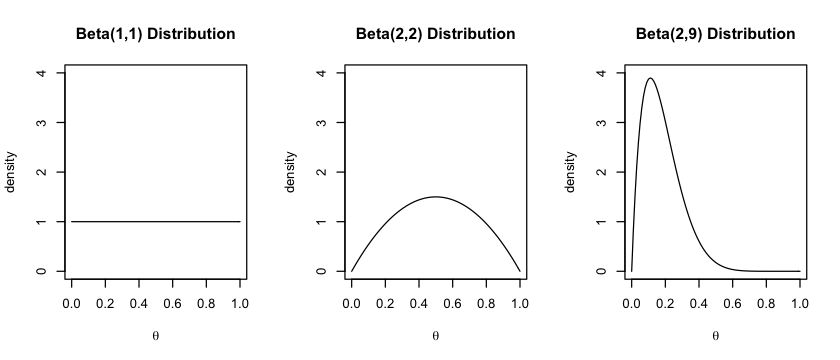

In [1]:
options(repr.plot.width=7, repr.plot.height=3)
theta <- seq(0, 1, 0.01)
par(mfrow=c(1,3))
plot(theta, dbeta(theta, 1, 1), type="l", main="Beta(1,1) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(theta, dbeta(theta, 2, 2), type="l", main="Beta(2,2) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(theta, dbeta(theta, 2, 9), type="l", main="Beta(2,9) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")

### 9.5.2 Posterior 

Now, we apply Bayes theorem to obtain the posterior distribution using a $Beta(a,b)$ distribution for the prior:  

$$
\begin{align}
p(\theta \mid y) &= \frac{ p(\theta)\, p(y \mid \theta)} {\int  p(\theta)\,p(y \mid \theta)\,d\theta}\\
         &\propto  p(\theta)\, p(y \mid \theta)
         \end{align}
$$

Substituting in the appropriate distributions gives

$$
\begin{align} 
p(\theta \mid y) &= \frac{\Gamma(a+ b)}{ \Gamma(a)\Gamma(b) } \theta^{a-1} (1-\theta)^{b-1}  {n \choose y} \theta^y (1-\theta)^{n-y} \\
         &\propto \theta^{a-1} (1-\theta)^{b-1} \theta^y (1-\theta)^{n-y} \\
         &\propto \theta^{a+y-1} (1-\theta)^{b+n-y-1} 
         \end{align}
$$


Now by inspection, we can see that this is in the form of a Beta distribution: we have that the posterior is proportional to $\theta^{a+y-1} (1-\theta)^{b+n-y-1}$. In other words, the posterior is $Beta(a+y, b+n-y).$ This distribution has mean given by: $\frac{a+y}{a+b+n}$ and variance $\frac{(a+y)(b+n-y)}{(a+b+n)^2(a+b+n+1)}.$  

Suppose the data we observe is $y=4$ successes out of a total of $10$ patients. Then: 

1. With the uniform $Beta(1,1)$ prior, our posterior is $Beta(5, 7)$. 
2. With the symmetrical $Beta(2, 2)$ prior, our posterior is $Beta(6, 8)$.
3. With the asymmetrical $Beta(2, 9)$ prior, our posterior is $Beta(6, 15)$. 

We plot the possible distibutions below: 

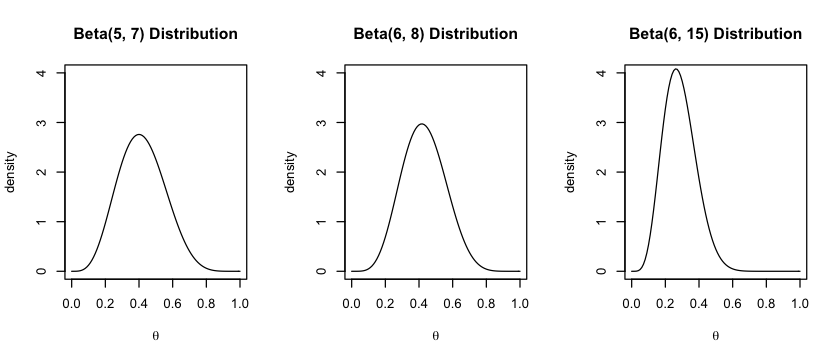

In [2]:
p <- seq(0, 1, 0.01)
par(mfrow=c(1,3))
plot(p, dbeta(p, 5, 7), type="l",  main="Beta(5, 7) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(p, dbeta(p, 6, 8), type="l", main="Beta(6, 8) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(p, dbeta(p, 6, 15), type="l", main="Beta(6, 15) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")

We can see that the uninformative prior leads to the posterior with the highest variance amongst the three. The narrow prior in the third example shifts the posterior distribution to the right. We can see that different choices of prior lead to different results. For this reason, it is often recommended to repeat analyses with different priors to see how much the results change: this is called *sensitivity analysis*.